Домашнее задание к лекции "Визуализация данных"

Содержание задания можно также найти здесь github.com...tion.ipynb

Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

**Требования к анализу:**

построить не менее 4 визуализаций различных видов;

каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;

по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?


Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области 
(тогда не забудьте их выложить на github вместе с ноутбуком).


Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;

данные о видео из трендов YouTube;

данные об уровне счастья в разных странах.

**Дополнительная часть (необязательная)**


построить дополнительно не менее 2 визуализаций (итого не менее 6);

в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [40]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
#загрузим файл с рейтингом вин (Wine Rating & Price)
file = 'red.csv' 
wine_df = pd.read_csv(file,na_values='N.V.')    
wine_df.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0


In [41]:
wine_df.Year.unique()

array([2011., 2017., 2015., 2019., 2016., 2014., 2013., 2018., 2012.,
       2010., 2007., 2005., 1999., 2002., 2008., 2006., 2009.,   nan,
       2000., 2004., 2001., 1996., 1998., 1990., 1995., 2003., 1993.,
       1988., 1989., 1997., 1992., 1991.])

In [42]:
wine_df['Year'] = wine_df.Year.astype('Int64')

In [43]:
wine_df.tail()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
8661,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016
8662,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016
8663,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010
8664,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019
8665,Portillo Cabernet Sauvignon 2016,Argentina,Tunuyán,Salentein,3.4,999,7.88,2016


In [44]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8658 non-null   Int64  
dtypes: Int64(1), float64(2), int64(1), object(4)
memory usage: 550.2+ KB


In [45]:
wine_df.describe()

,Rating,NumberOfRatings,Price,Year
count,8666.000000,8666.000000,8666.000000,8658.000000
mean,3.890342,415.287445,39.145065,2014.818434
std,0.308548,899.726373,84.936307,3.281252
min,2.500000,25.000000,3.550000,1988.000000
25%,3.700000,66.000000,10.680000,2014.000000
50%,3.900000,157.000000,18.200000,2016.000000
75%,4.100000,401.000000,38.142500,2017.000000
max,4.800000,20293.000000,3410.790000,2019.000000


**Построим матрицу графиков с помощью seaborn**

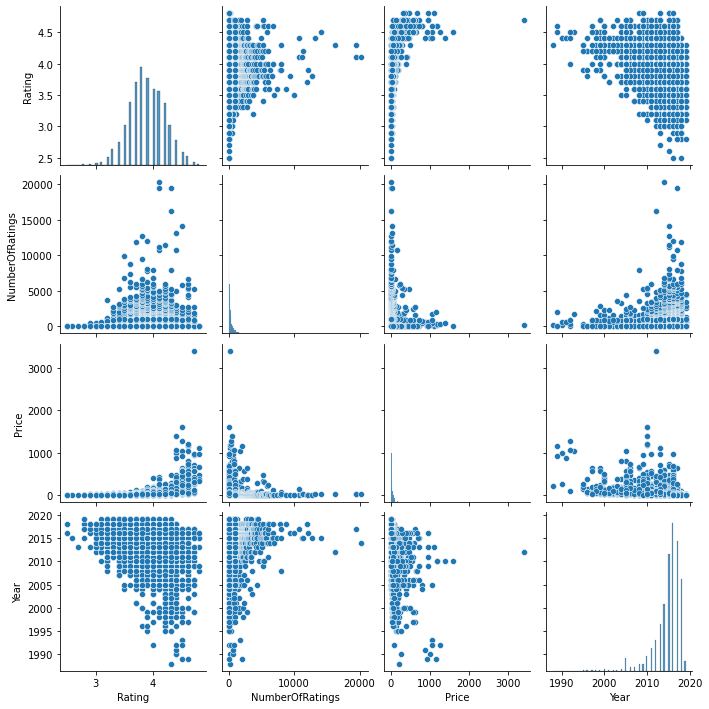

In [46]:
sns.pairplot(data=wine_df)

[Text(0.5, 0, 'Рейтинг вина'), Text(0, 0.5, 'Цена дол.США')]

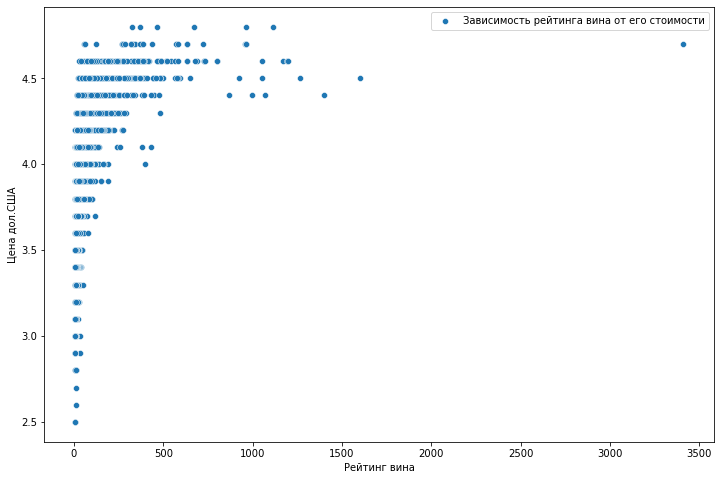

In [47]:
#Гипотеза- чем дороже вино, тем выше у него рейтиг
plt.figure(figsize=(12,8))
sns.scatterplot(data=wine_df,y='Rating',x='Price',
             label="Зависимость рейтинга вина от его стоимости").set(xlabel='Рейтинг вина',ylabel='Цена дол.США')


Гипотеза полностью подтвердилась 

**Топ 20 стран** по производству вина или гипотеза, что больше всего видов вин производит Италия

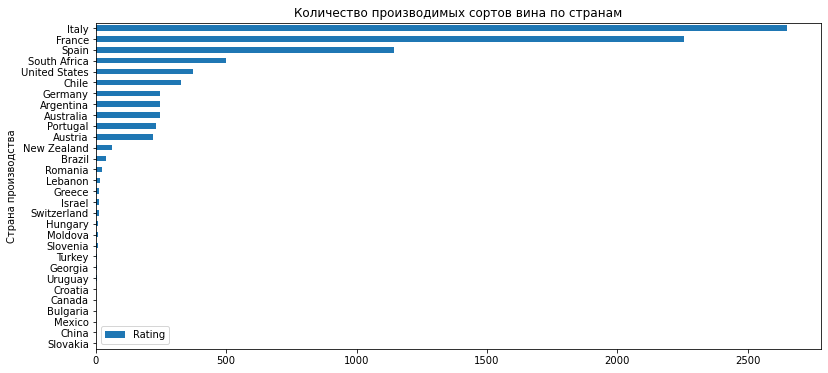

In [48]:

countries_wine_df= wine_df.groupby(['Country']).agg({'Rating':'count'}).sort_values(
    by='Rating', ascending=True).plot(kind='barh',xlabel='Страна производства',
                                      ylabel='Количество производимых сортов вина ',
                                     title='Количество производимых сортов вина по странам')

Гипотеза подтвердилась

**Проверим, какому статитстическому закону подчиняется распределение значения 'Rating'**

Text(0.5, 1.0, "Распределение значения 'Rating'")

<Figure size 864x576 with 0 Axes>

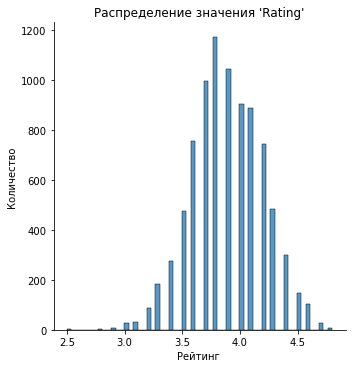

In [64]:
plt.figure(figsize=(12,8))

ax = sns.displot(wine_df['Rating']).set(xlabel='Рейтинг ',ylabel='Количество')
plt.title("Распределение значения 'Rating'")

Вывод- мы видим **нормальное распределение значений** показателя 'Rating'

**Гипотеза- чем старше вино, тем выше у него рейтинг**

[Text(0.5, 0, 'Год урожая виноматериала '), Text(0, 0.5, 'Рейтинг вина')]

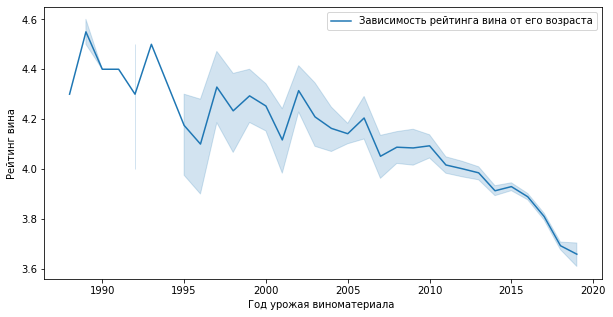

In [683]:
plt.figure(figsize=(10,5))
sns.lineplot(data=wine_df,x='Year',y='Rating',
             label="Зависимость рейтинга вина от его возраста").set(xlabel='Год урожая виноматериала ',ylabel='Рейтинг вина')


**Будем сравнивать оценки винам с группировкой по топ-10 стран-производителей вин**

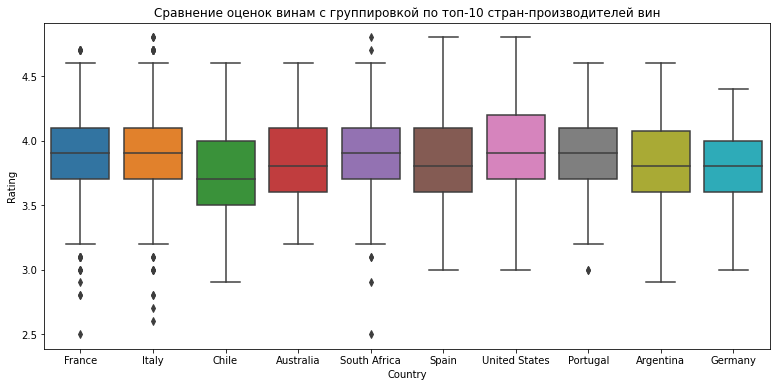

In [56]:
top_wine_countries = wine_df.groupby(['Country']).agg({'Rating':'count'}).sort_values(by='Rating', ascending=False)[:10].index.values
top_wine_countries
ax = sns.boxplot(x="Country", y="Rating",
            data=wine_df[wine_df.Country.isin(top_wine_countries)]).set_title('Cравнение оценок винам с группировкой по топ-10 стран-производителей вин')

Один из выводов-**Франция, Италия, Южная Африка- имеют выбросы как выше 75 квантиля, так и ниже 25 квантиля.**
Это говорит о том, что для этих стран высокие и низкие рейтинги не характерны, как например для вин производства Испании и США.


**Построим тепловую карту c медианной стоимостью вин, соответствующей им рейтингу, с группировкой по топ-10 стран- производителей вина**


In [763]:
countries_price_rating= wine_df[wine_df.Country.isin(top_wine_countries)].pivot_table(
                        index='Country', 
                        columns='Rating', 
                        values='Price', 
                        aggfunc='mean').fillna(0)

countries_price_rating

Rating,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,...,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.00,0.0,0.00,0.000,5.95,0.0000,8.990000,5.706667,7.113333,8.515263,...,17.244500,16.947083,30.217273,34.317692,45.886667,55.793333,82.876000,112.256667,0.000000,0.000000
Australia,0.00,0.0,0.00,0.000,0.00,0.0000,0.000000,8.098000,8.610000,9.192000,...,22.840000,28.804167,37.885238,67.417895,91.547500,188.561667,232.435000,556.226667,0.000000,0.000000
Chile,0.00,0.0,0.00,0.000,6.90,7.9000,7.580000,6.369000,8.776667,8.763636,...,17.011515,22.460500,31.359000,34.744000,64.302500,66.105000,64.030000,201.880000,0.000000,0.000000
France,8.29,0.0,0.00,9.140,6.51,7.4850,10.175000,8.780769,12.119643,12.335349,...,34.543289,43.535236,57.196304,78.977143,106.650567,189.338737,372.804565,491.277188,944.978571,0.000000
Germany,0.00,0.0,0.00,0.000,0.00,14.4575,7.465000,9.501667,10.015000,11.647778,...,21.585476,31.005600,33.417187,60.712000,33.050000,48.550000,0.000000,0.000000,0.000000,0.000000
Italy,0.00,11.5,9.12,8.405,0.00,6.4625,7.146667,7.747647,10.280000,9.079412,...,19.201531,25.938251,31.390355,47.945394,62.473515,86.188725,174.105472,273.615588,445.417273,800.206667
Portugal,0.00,0.0,0.00,0.000,0.00,5.2750,0.000000,13.160000,6.380000,10.283333,...,13.654000,17.352759,23.278750,33.924074,37.030000,51.003333,55.977143,84.825000,0.000000,0.000000
South Africa,7.50,0.0,0.00,0.000,8.32,0.0000,7.725000,6.682000,9.287368,7.989130,...,19.356119,21.324000,24.891833,31.809524,45.007917,51.643636,90.114000,125.875000,63.000000,463.030000
Spain,0.00,0.0,0.00,0.000,0.00,5.5680,5.975000,8.421875,8.337250,8.022653,...,19.362481,24.070833,33.348700,39.109157,55.656379,80.021111,84.765000,192.590000,385.410000,672.600000


Text(0.5, 1.0, 'Медианная стоимость вин, соответствующий им рейтинг, с группировкой по топ-10 стран- производителей вина')

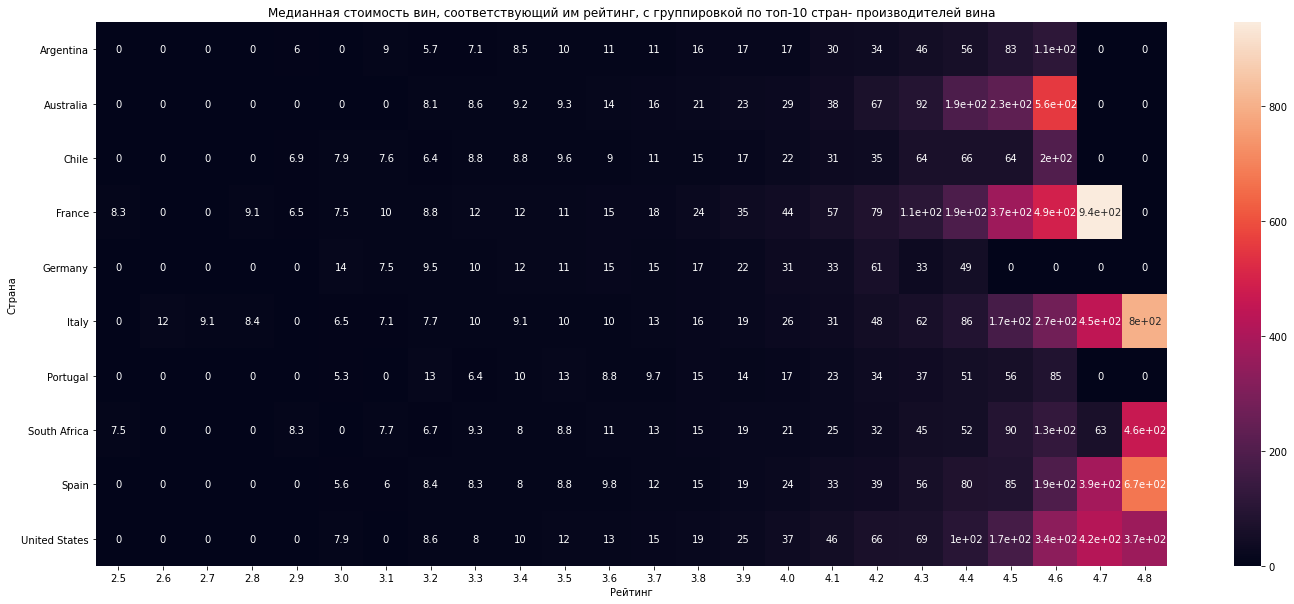

In [67]:
plt.figure(figsize=(24,10))
ax = sns.heatmap(countries_price_rating,annot=True).set(xlabel='Рейтинг',ylabel='Страна')
plt.title('Медианная стоимость вин, соответствующий им рейтинг, с группировкой по топ-10 стран- производителей вина')

**Один из выводов- США и Южная Африка имеют самые дешевые вина с максимальным рейтингом 4,8